<a href="https://colab.research.google.com/github/ShoaibSheriff/Computer-Vision/blob/master/Google_Autoaugment_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random

def runWithProbabilityP(p) :
  rnd = random.randrange(0, 100)
  #print(rnd)
  if (rnd < (p*100)) :
    return True
  else :
    return False

In [0]:
#runWithProbabilityP(0.1)

In [0]:
!pip install Pillow

from __future__ import print_function

import os.path
import scipy

import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import backend as K

(trainX, trainY), (testX, testY) = cifar10.load_data()

myimage = trainX[4998]
#type(myimage)

Using TensorFlow backend.


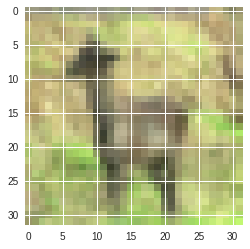

In [0]:
##Original

%matplotlib inline
plt.figure()
plt.imshow(myimage)


In [0]:
#Shear runShearYWithP

from skimage import transform as tf

def runShearYWithP(im, p, m) :
  if(runWithProbabilityP(p)) :
    afine_tf = tf.AffineTransform(shear=(-0.3 + (m * 0.6)))
    im = tf.warp(im, inverse_map=afine_tf)
    im = Image.fromarray((im * 255).astype('uint8'))
  return im

In [0]:
#Invert

from PIL import Image, ImageOps

def runInvertWithP(im, p, m) :
  if(runWithProbabilityP(p)) :
    im = ImageOps.invert(im)
  return im

In [0]:
#Contrast

from PIL import ImageEnhance

def runContrastWithP(im, p, m) :
  if(runWithProbabilityP(p)) :
    enhancer = ImageEnhance.Contrast(im)
    im = enhancer.enhance(0.1 + m*1.8)
  return im

In [0]:
#Rotate

from PIL import Image, ImageOps

def runRotateWithP(im, p, m) :
  if(runWithProbabilityP(p)) :
    im = im.rotate(-30 + m*30)
  return im

In [0]:
#TranslateX

from PIL import Image
def runTranslateXWithP(im, p, m) :
  if(runWithProbabilityP(p)) :
    a = 1
    b = 0
    c = -15 + (m *  30) # +left/-right 
    d = 0
    e = 1
    f = 0 # +up/-down 
    im.transform(im.size, Image.AFFINE, (a, b, c, d, e, f))
  return im

In [0]:
#TranslateY

from PIL import Image
def runTranslateYWithP(im, p, m) :
  if(runWithProbabilityP(p)) :
    a = 1
    b = 0
    c = 0 # +left/-right 
    d = 0
    e = 1
    f = -15 + (m *  30) # +up/-down 
    im.transform(im.size, Image.AFFINE, (a, b, c, d, e, f))
  return im

In [0]:
#Sharpness

from PIL import ImageEnhance

def runSharpnessWithP(im, p, m) :
  if(runWithProbabilityP(p)) :
    enhancer = ImageEnhance.Sharpness(im)
    im = enhancer.enhance(0.1 + m*1.8)
  return im

In [0]:
#Autocontrast
from PIL import Image, ImageOps

def runAutoContrastWithP(im, p, m) :
  if(runWithProbabilityP(p)) :
    im = ImageOps.autocontrast(im)
  return im

In [0]:
#Equalize
from PIL import Image, ImageOps

def runEqualizeWithP(im, p, m) :
  if(runWithProbabilityP(p)) :
    im = ImageOps.equalize(im)
  return im

In [0]:
#Posterize
from PIL import Image, ImageOps

def runPosterizeWithP(im, p, m) :
  if(runWithProbabilityP(p)) :
    im = ImageOps.posterize(im, int(4 + m*4 // 1))
  return im

In [0]:
#Color

from PIL import ImageEnhance

def runColorWithP(im, p, m) :
  if(runWithProbabilityP(p)) :
    enhancer = ImageEnhance.Color(im)
    im = enhancer.enhance(0.1 + m*1.8)
  return im

In [0]:
#Brightness

from PIL import ImageEnhance

def runBrightnessWithP(im, p, m) :
  if(runWithProbabilityP(p)) :
    enhancer = ImageEnhance.Brightness(im)
    im = enhancer.enhance(0.1 + m*1.8)
  return im

In [0]:
#Solarize

from PIL import Image, ImageOps

def runSolarizeWithP(im, p, m) :
  if(runWithProbabilityP(p)) :
    im = ImageOps.solarize(im, m * 256)
  return im

In [0]:
im = Image.fromarray(myimage)

'''
Sub-policy 0 (Invert,0.1,7) (Contrast,0.2,6)
Sub-policy 1 (Rotate,0.7,2) (TranslateX,0.3,9)
Sub-policy 2 (Sharpness,0.8,1) (Sharpness,0.9,3)
Sub-policy 3 (ShearY,0.5,8) (TranslateY,0.7,9)
Sub-policy 4 (AutoContrast,0.5,8) (Equalize,0.9,2)'''

im = runInvertWithP(im, 0.1, 7/10)
im = runContrastWithP(im, 0.2, 6/10)
im = runRotateWithP(im, 0.7, 2/10)
im = runTranslateXWithP(im, 0.3, 9/10)
im = runSharpnessWithP(im, 0.8, 1/10)
im = runSharpnessWithP(im, 0.9, 3/10)
im = runShearYWithP(im, 0.5, 8/10)
im = runTranslateYWithP(im, 0.7, 9/10)
im = runAutoContrastWithP(im, 0.5, 8/10)
im = runEqualizeWithP(im, 0.9, 2/10)

'''
Sub-policy 5 (ShearY,0.2,7) (Posterize,0.3,7)
Sub-policy 6 (Color,0.4,3) (Brightness,0.6,7)
Sub-policy 7 (Sharpness,0.3,9) (Brightness,0.7,9)
Sub-policy 8 (Equalize,0.6,5) (Equalize,0.5,1)
Sub-policy 9 (Contrast,0.6,7) (Sharpness,0.6,5)'''

im = runShearYWithP(im, 0.2, 7/10)
im = runPosterizeWithP(im, 0.3, 7/10)
im = runColorWithP(im, 0.4, 3/10)
im = runBrightnessWithP(im, 0.6, 7/10)
im = runSharpnessWithP(im, 0.3, 9/10)
im = runBrightnessWithP(im, 0.7, 9/10)
im = runEqualizeWithP(im, 0.6, 5/10)
im = runEqualizeWithP(im, 0.5, 1/10)
im = runContrastWithP(im, 0.6, 7/10)
im = runSharpnessWithP(im, 0.6, 5/10)


'''
Sub-policy 10 (Color,0.7,7) (TranslateX,0.5,8)
Sub-policy 11 (Equalize,0.3,7) (AutoContrast,0.4,8)
Sub-policy 12 (TranslateY,0.4,3) (Sharpness,0.2,6)
Sub-policy 13 (Brightness,0.9,6) (Color,0.2,8)
Sub-policy 14 (Solarize,0.5,2) (Invert,0.0,3)'''

im = runColorWithP(im, 0.7, 7/10)
im = runTranslateXWithP(im, 0.5, 8/10)
im = runEqualizeWithP(im, 0.3, 7/10)
im = runAutoContrastWithP(im, 0.4, 8/10)
im = runTranslateYWithP(im, 0.4, 3/10)
im = runSharpnessWithP(im, 0.2, 6/10)
im = runBrightnessWithP(im, 0.9, 6/10)
im = runColorWithP(im, 0.2, 8/10)
im = runSolarizeWithP(im, 0.5, 2/10)
im = runInvertWithP(im, 0, 3/10)

'''
Sub-policy 15 (Equalize,0.2,0) (AutoContrast,0.6,0)
Sub-policy 16 (Equalize,0.2,8) (Equalize,0.6,4)
Sub-policy 17 (Color,0.9,9) (Equalize,0.6,6)
Sub-policy 18 (AutoContrast,0.8,4) (Solarize,0.2,8)
Sub-policy 19 (Brightness,0.1,3) (Color,0.7,0)'''

im = runEqualizeWithP(im, 0.2, 0)
im = runAutoContrastWithP(im, 0.6, 0)
im = runEqualizeWithP(im, 0.2, 8/10)
im = runEqualizeWithP(im, 0.6, 4/10)
im = runColorWithP(im, 0.9, 9/10)
im = runEqualizeWithP(im, 0.6, 6/10)
im = runAutoContrastWithP(im, 0.8, 4/10)
im = runSolarizeWithP(im, 0.2, 8/10)
im = runBrightnessWithP(im, 0.1, 3/10)
im = runColorWithP(im, 0.7, 0)


'''
Sub-policy 20 (Solarize,0.4,5) (AutoContrast,0.9,3)
Sub-policy 21 (TranslateY,0.9,9) (TranslateY,0.7,9)
Sub-policy 22 (AutoContrast,0.9,2) (Solarize,0.8,3)
Sub-policy 23 (Equalize,0.8,8) (Invert,0.1,3)
Sub-policy 24 (TranslateY,0.7,9) (AutoContrast,0.9,1)'''

im = runSolarizeWithP(im, 0.4, 5/10)
im = runAutoContrastWithP(im, 0.9, 3/10)
im = runTranslateYWithP(im, 0.9, 9/10)
im = runTranslateYWithP(im, 0.7, 9/10)
im = runAutoContrastWithP(im, 0.9, 2/10)
im = runSolarizeWithP(im, 0.8, 3/10)
im = runEqualizeWithP(im, 0.8, 8/10)
im = runInvertWithP(im, 0.1, 3/10)
im = runTranslateYWithP(im, 0.7, 9/10)
im = runAutoContrastWithP(im, 0.9, 1/10)


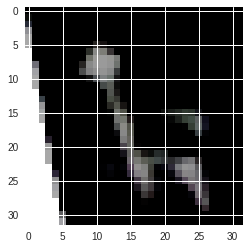

In [0]:
plt.imshow(im)
